In [11]:
import tweepy  #another popular twitter API wrapper
import json
import config   #twitter OAuth configuration
import datetime
import pylib
import utils
import python_utils
from datetime import datetime
from dateutil import tz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import urllib2
import csv
import time

In [14]:

# the authentication process for tweepy
auth = tweepy.OAuthHandler("Oaiu1JguieNrSkoCyNh6jGvIg","ceaCiux8njHGe5x07WikXARUNCh9PVGzeL3EpMGBgohnVSVJbY")
auth.set_access_token("2295578748-WwyxCL32c0TOdHan9cjlMWkcEIjI2IxmSpsYYyh","Rv1kE1hQqVqmBmLSemVCLlwhxWKs1DMzNw6EDK4WrdlsI")
api = tweepy.API(auth)

In [107]:
tweets = api.user_timeline(id="cnnbrk",count=100)

In [108]:
df = pd.DataFrame()

df['Tweet'] = [t.text for t in tweets]
df['Retweet_Count'] = [t.retweet_count for t in tweets]
df['Source'] = [t.source for t in tweets]
df['Favorite_Count'] = [t.favorite_count for t in tweets]

# from_zone = tz.tzutc()
# to_zone = tz.tzlocal()
df['Created_At'] = [t.created_at.replace(tzinfo=tz.tzutc()).astimezone(tz.tzlocal()) for t in tweets]

In [114]:
count = 0

for t in tweets:
    urls = [url['url'] for url in t.entities['urls']]
    hashtags = [hashtag['text'] for hashtag in t.entities['hashtags']]
    
    df['Url_Count'][count] = len(urls)
    df['Hashtag_Count'][count] = len(hashtags)  
        
    df['Urls'][count] = ','.join(urls)
    df['Hashtags'][count] = ','.join(hashtags)
    
    count+=1

C:\Users\saura\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\saura\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\saura\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\saura\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [115]:
df.head()

,Tweet,Retweet_Count,Source,Favorite_Count,Created_At,Urls,Hashtags,Url_Count,Hashtag_Count
0,"Tiger Woods apologizes for DUI arrest, says it...",241,TweetDeck,317,2017-05-29 17:15:44-07:00,https://t.co/wu1TqgTvqq,,1.0,0.0
1,"More than 300,000 evacuated in Bangladesh as c...",191,TweetDeck,171,2017-05-29 16:55:06-07:00,https://t.co/FEoltYdtCJ,,1.0,0.0
2,"Ivanka Trump and Jared Kushner ""unfazed"" by sc...",231,TweetDeck,534,2017-05-29 14:13:36-07:00,https://t.co/S4VpPPKKAu,,1.0,0.0
3,"Robert Mueller, special counsel in the Russia ...",357,TweetDeck,1038,2017-05-29 13:19:35-07:00,https://t.co/YI74E5q0dZ,,1.0,0.0
4,"Sportswriter and commentator Frank Deford, kno...",227,TweetDeck,535,2017-05-29 11:49:55-07:00,https://t.co/OjtAcS4dlX,,1.0,0.0


In [111]:
from wordcloud import WordCloud,STOPWORDS
text = (' '.join(list(df['Tweet'])))

In [92]:
text

'RT @GenePark: Just a snapshot of some of the incredibly nice things folks on @Reddit are saying about @washingtonpost https://t.co/7ydOUXXe… RT @zachbraff: Someone on @reddit posted the "set list" for Monday\'s all day Scrubs marathon on @ComedyCentral . Which episode do you think… RT @adage: .@washingtonpost, @AdvanceLocal among first publishers to get a @reddit profile page https://t.co/5Ms5enY07L https://t.co/2wlLSb… RT @WPTV: His mom didn\'t want him to announce his Disneyland proposal on Facebook, so he went to Reddit https://t.co/jSAswnDXJx https://t.c… RT @TheCamKirk: Doing a "Ask Me Anything" today at 4pm with Hip Hop Heads @reddit discussing things surrounding my career and how I linked… RT @GenePark: Live shot of @Fahrenthold venturing into @Reddit for the first time for an AMA https://t.co/oTCRp4w6bj https://t.co/F5ePjfjIYN RT @drewharwell: Nice guy @Fahrenthold is doing a Reddit AMA. Can\'t wait to log on and read all the kind things he is saying https://t.co/M… RT @thatgi

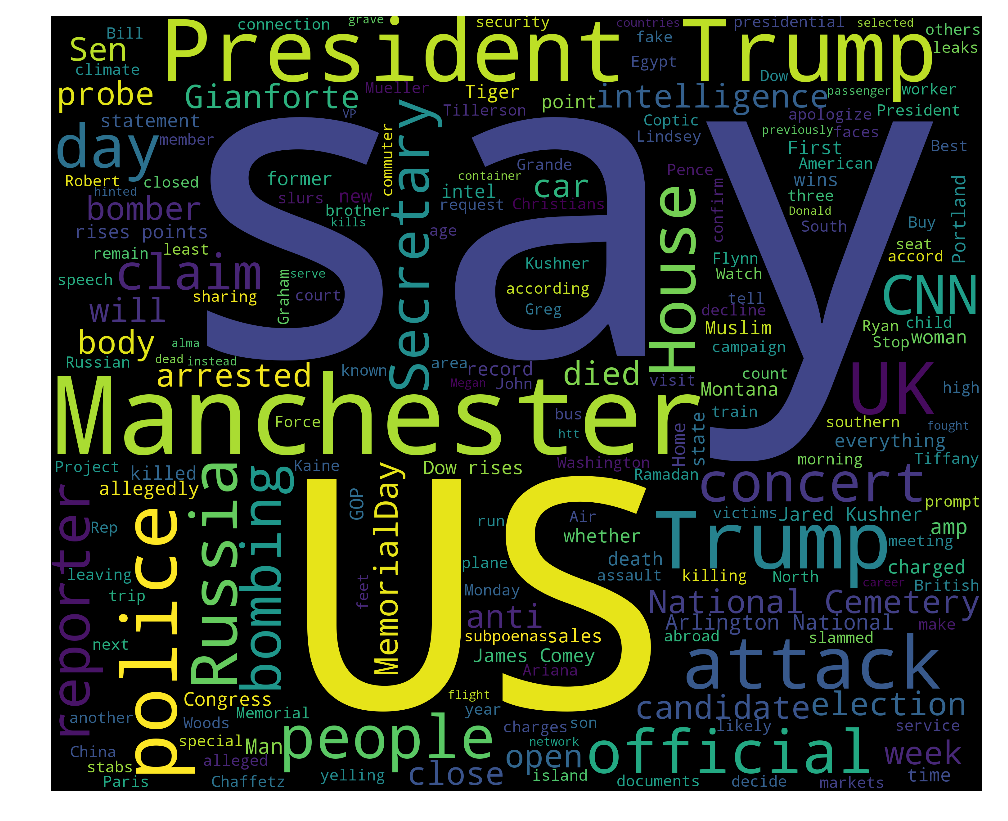

In [112]:

cleaned_word = " ".join([word for word in text.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

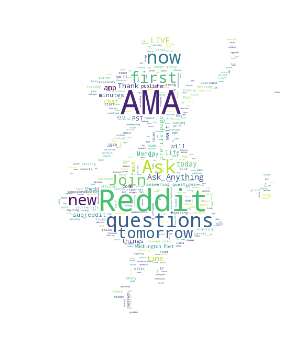

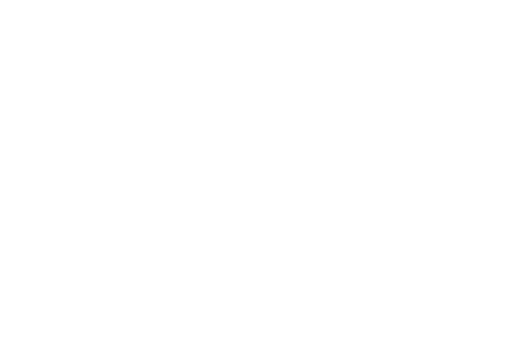

In [91]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

d = path.dirname("C:\\Users\\saura\\Desktop\\alice.jpg")

alice_mask = np.array(Image.open(path.join(d, "alice.jpg")))

wordcloud = WordCloud(background_color="white",max_words=2000, mask=alice_mask,
               stopwords=STOPWORDS)

wordcloud.generate(cleaned_word)

# store to file
wordcloud.to_file(path.join(d, "alice.png"))

# show
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure()
#plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()